<h1 id="tocheading">Оглавление</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Описание проекта <a class="anchor" id="first-bullet"></a>



Вы работаете в интернет-магазине «Стримчик », который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр , оценки пользователей и экспертов, жанры и платформы
(например, Xbox или PlayStation ). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Подготовьте данные**

* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
*  Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
*  Опишите причины, которые могли привести к пропускам;
*  Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
*  Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

**Проведите исследовательский анализ данных**

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Составьте портрет пользователя каждого региона**

* Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Проверьте гипотезы**

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
* Задайте самостоятельно пороговое значение alpha.

Поясните:
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.

**Напишите общий вывод**

Перед вами данные до 2016 года. Представим , что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ем у подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Япон ии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# 1. Изучение данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats as st

In [3]:
df = pd.read_csv('/datasets/filename.csv')

In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [5]:
display(df.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
display(df.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
display(df.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
#Посмотрим на уникальные значения в каждом столбце
columns = list(df)

for i in columns:
    display('{} {}'.format(i, df[i].sort_values().unique()))



'Name [\' Beyblade Burst\' \' Fire Emblem Fates\' " Frozen: Olaf\'s Quest" ...\n \'wwe Smackdown vs. Raw 2006\' \'¡Shin Chan Flipa en colores!\' nan]'

"Platform ['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'\n 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'\n 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']"

'Year_of_Release [1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.\n 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.\n 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.\n 2016.   nan]'

"Genre ['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'\n 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy' nan]"

'NA_sales [0.000e+00 1.000e-02 2.000e-02 3.000e-02 4.000e-02 5.000e-02 6.000e-02\n 7.000e-02 8.000e-02 9.000e-02 1.000e-01 1.100e-01 1.200e-01 1.300e-01\n 1.400e-01 1.500e-01 1.600e-01 1.700e-01 1.800e-01 1.900e-01 2.000e-01\n 2.100e-01 2.200e-01 2.300e-01 2.400e-01 2.500e-01 2.600e-01 2.700e-01\n 2.800e-01 2.900e-01 3.000e-01 3.100e-01 3.200e-01 3.300e-01 3.400e-01\n 3.500e-01 3.600e-01 3.700e-01 3.800e-01 3.900e-01 4.000e-01 4.100e-01\n 4.200e-01 4.300e-01 4.400e-01 4.500e-01 4.600e-01 4.700e-01 4.800e-01\n 4.900e-01 5.000e-01 5.100e-01 5.200e-01 5.300e-01 5.400e-01 5.500e-01\n 5.600e-01 5.700e-01 5.800e-01 5.900e-01 6.000e-01 6.100e-01 6.200e-01\n 6.300e-01 6.400e-01 6.500e-01 6.600e-01 6.700e-01 6.800e-01 6.900e-01\n 7.000e-01 7.100e-01 7.200e-01 7.300e-01 7.400e-01 7.500e-01 7.600e-01\n 7.700e-01 7.800e-01 7.900e-01 8.000e-01 8.100e-01 8.200e-01 8.300e-01\n 8.400e-01 8.500e-01 8.600e-01 8.700e-01 8.800e-01 8.900e-01 9.000e-01\n 9.100e-01 9.200e-01 9.300e-01 9.400e-01 9.500e-01 9.6

'EU_sales [0.000e+00 1.000e-02 2.000e-02 3.000e-02 4.000e-02 5.000e-02 6.000e-02\n 7.000e-02 8.000e-02 9.000e-02 1.000e-01 1.100e-01 1.200e-01 1.300e-01\n 1.400e-01 1.500e-01 1.600e-01 1.700e-01 1.800e-01 1.900e-01 2.000e-01\n 2.100e-01 2.200e-01 2.300e-01 2.400e-01 2.500e-01 2.600e-01 2.700e-01\n 2.800e-01 2.900e-01 3.000e-01 3.100e-01 3.200e-01 3.300e-01 3.400e-01\n 3.500e-01 3.600e-01 3.700e-01 3.800e-01 3.900e-01 4.000e-01 4.100e-01\n 4.200e-01 4.300e-01 4.400e-01 4.500e-01 4.600e-01 4.700e-01 4.800e-01\n 4.900e-01 5.000e-01 5.100e-01 5.200e-01 5.300e-01 5.400e-01 5.500e-01\n 5.600e-01 5.700e-01 5.800e-01 5.900e-01 6.000e-01 6.100e-01 6.200e-01\n 6.300e-01 6.400e-01 6.500e-01 6.600e-01 6.700e-01 6.800e-01 6.900e-01\n 7.000e-01 7.100e-01 7.200e-01 7.300e-01 7.400e-01 7.500e-01 7.600e-01\n 7.700e-01 7.800e-01 7.900e-01 8.000e-01 8.100e-01 8.200e-01 8.300e-01\n 8.400e-01 8.500e-01 8.600e-01 8.700e-01 8.800e-01 8.900e-01 9.000e-01\n 9.100e-01 9.200e-01 9.300e-01 9.400e-01 9.500e-01 9.6

'JP_sales [0.000e+00 1.000e-02 2.000e-02 3.000e-02 4.000e-02 5.000e-02 6.000e-02\n 7.000e-02 8.000e-02 9.000e-02 1.000e-01 1.100e-01 1.200e-01 1.300e-01\n 1.400e-01 1.500e-01 1.600e-01 1.700e-01 1.800e-01 1.900e-01 2.000e-01\n 2.100e-01 2.200e-01 2.300e-01 2.400e-01 2.500e-01 2.600e-01 2.700e-01\n 2.800e-01 2.900e-01 3.000e-01 3.100e-01 3.200e-01 3.300e-01 3.400e-01\n 3.500e-01 3.600e-01 3.700e-01 3.800e-01 3.900e-01 4.000e-01 4.100e-01\n 4.200e-01 4.300e-01 4.400e-01 4.500e-01 4.600e-01 4.700e-01 4.800e-01\n 4.900e-01 5.000e-01 5.100e-01 5.200e-01 5.300e-01 5.400e-01 5.500e-01\n 5.600e-01 5.700e-01 5.800e-01 5.900e-01 6.000e-01 6.100e-01 6.200e-01\n 6.300e-01 6.400e-01 6.500e-01 6.600e-01 6.700e-01 6.800e-01 6.900e-01\n 7.000e-01 7.100e-01 7.200e-01 7.300e-01 7.400e-01 7.500e-01 7.600e-01\n 7.700e-01 7.800e-01 7.900e-01 8.000e-01 8.100e-01 8.200e-01 8.300e-01\n 8.400e-01 8.500e-01 8.600e-01 8.700e-01 8.800e-01 8.900e-01 9.000e-01\n 9.100e-01 9.200e-01 9.300e-01 9.400e-01 9.500e-01 9.6

'Other_sales [0.000e+00 1.000e-02 2.000e-02 3.000e-02 4.000e-02 5.000e-02 6.000e-02\n 7.000e-02 8.000e-02 9.000e-02 1.000e-01 1.100e-01 1.200e-01 1.300e-01\n 1.400e-01 1.500e-01 1.600e-01 1.700e-01 1.800e-01 1.900e-01 2.000e-01\n 2.100e-01 2.200e-01 2.300e-01 2.400e-01 2.500e-01 2.600e-01 2.700e-01\n 2.800e-01 2.900e-01 3.000e-01 3.100e-01 3.200e-01 3.300e-01 3.400e-01\n 3.500e-01 3.600e-01 3.700e-01 3.800e-01 3.900e-01 4.000e-01 4.100e-01\n 4.200e-01 4.300e-01 4.400e-01 4.500e-01 4.600e-01 4.700e-01 4.800e-01\n 4.900e-01 5.000e-01 5.100e-01 5.200e-01 5.300e-01 5.400e-01 5.500e-01\n 5.600e-01 5.700e-01 5.800e-01 5.900e-01 6.000e-01 6.100e-01 6.200e-01\n 6.300e-01 6.400e-01 6.600e-01 6.700e-01 6.800e-01 6.900e-01 7.000e-01\n 7.100e-01 7.200e-01 7.300e-01 7.400e-01 7.500e-01 7.600e-01 7.700e-01\n 7.800e-01 7.900e-01 8.000e-01 8.100e-01 8.200e-01 8.300e-01 8.400e-01\n 8.500e-01 8.600e-01 8.700e-01 8.900e-01 9.000e-01 9.100e-01 9.200e-01\n 9.300e-01 9.400e-01 9.600e-01 9.700e-01 9.800e-01 

'Critic_Score [13. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.\n 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.\n 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.\n 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.\n 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. nan]'

"User_Score ['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'\n '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'\n '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'\n '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'\n '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'\n '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'\n '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'\n '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]"

"Rating ['AO' 'E' 'E10+' 'EC' 'K-A' 'M' 'RP' 'T' nan]"

## Выводы

Мы провели первичное изучение данных.Есть пропуски в столбце с годом релиза, оценками критиков, юзеров и рейтингом. Названия столбцов содержат прописные буквы. Столбец с годом релиза лучше изменить на целочисленный тип.

# 2. Предобработка данных

* Замените названия столбцов (приведите к нижнему регистру);

* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

* Обработайте пропуски при необходимости:

* Объясните, почему заполнили пропуск и определённым образом или почему не стали это делать ;

* Опишите причины , которые могли привести к пропускам ;

* Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [9]:
df.columns = df.columns.str.lower()
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [10]:
display(df[df['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
display(df['year_of_release'].isna().sum())
display(df['year_of_release'].isna().sum()/df['year_of_release'].count())

269

0.01635656086586404

Количество наблюдений с пропусками в столбце с годом релиза составляет 1,6% от общего числа наблюдений. Решено удалить)

In [12]:
df.dropna(subset = ['year_of_release'], inplace = True)

In [13]:
display(df['year_of_release'].isna().sum()) #проверяем, остались ли пропуски, если 0, то все ОК

0

In [14]:
#Приведем формат к целочисленному
df['year_of_release'] = pd.to_numeric(df['year_of_release'], downcast = 'integer')

In [15]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int16  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int16(1), object(5)
memory usage: 1.4+ MB


None

In [16]:
#посмотрим, часто ли повторяются названия игр в датафрейме
df['name'].value_counts()

Need for Speed: Most Wanted    12
FIFA 14                         9
Ratatouille                     9
LEGO Marvel Super Heroes        9
LEGO The Hobbit                 8
                               ..
Death Trap                      1
Let's Cheer                     1
Hamster Heroes                  1
WinBack 2: Project Poseidon     1
My Baby 3 & Friends             1
Name: name, Length: 11426, dtype: int64

In [17]:
#ранее были пропуски в столбцах name и genre - кажется, эти строки мы удалили вместе с пропущенными строками по году релиза
display(df[df['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [18]:
df.drop(labels = [659, 14244],axis = 0, inplace = True)
display(df['name'].isna().sum()) #проверяем, остались ли пропуски, если 0, то все ОК

0

In [19]:
#посмотрим, что за строки содержат значение 'tbd' в столбце 'user_score'
display(df[df['user_score'] == 'tbd'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Непонятно, что значит tbd, возможно 'to be determined' ('подлежит определению')?? всего 2376 строк с таким значением.
Решено заменить это значение на NaN и считать пропуском

In [20]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = -1

In [21]:
display(df[df['user_score'] == -1]['user_score'].count())#проверочка

2376

In [22]:
pivot = pd.pivot_table(df, index = 'name', values = ['critic_score', 'user_score', 'rating'], aggfunc = ['mean', 'count'])
display(pivot)

mean        count                  
                             critic_score critic_score rating user_score
name                                                                    
 Tales of Xillia 2                   71.0            1      1          1
.hack//Infection Part 1              75.0            1      1          1
.hack//Mutation Part 2               76.0            1      1          1
.hack//Outbreak Part 3               70.0            1      1          1
007 Racing                           51.0            1      1          1
...                                   ...          ...    ...        ...
th!nk Logic Trainer                   NaN            0      0          0
thinkSMART                            NaN            0      1          1
thinkSMART FAMILY!                    NaN            0      1          1
thinkSMART: Chess for Kids            NaN            0      1          1
¡Shin Chan Flipa en colores!          NaN            0      0          0

[11426 rows x 4 columns]

In [23]:
#заполним пропуски в столбцах 'critic_score', 'user_score', 'rating' нейтральными значениями. 
#Мы не можем сделать предположение, какое значение подставить (среднее, медиану и т.д.).
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df['rating'] = df['rating'].fillna('unknown')

In [24]:
#Приведем к целочисленному типу данные в столбце с оценкой критиков (все равно десятые доли в этом столбце содержат нули)
df['critic_score'] = pd.to_numeric(df['critic_score'],downcast = 'integer')

In [25]:
#Также сменим тип данных в столбце user_score
df['user_score'] = df['user_score'].astype(float)

In [26]:
#проверим, не осталось ли пропусков и дублей
display(df.isna().sum())

display(df.duplicated().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

0

In [27]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


In [28]:
display(df['user_score'].unique())

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

In [29]:
display(df['user_score'].describe())
display(df.info())

count    16444.000000
mean         2.688081
std          4.170124
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int16  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int8   
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int16(1), int8(1), object(4)
memory usage: 1.4+ MB


None

## Выводы

Мы привели названия столбцов к нижнему регистру.

Удалили 2 строки с пропусками в названии и жанре игры, т.к. они не несут ценности в информационном плане. Удалили строки с пропусками в столбце с годом релиза.

Непонятно, что значит 'tbd' в столбце 'user_score', возможно 'to be determined' ('подлежит определению')?? Решено заменить это значение на -1 и считать пропуском.

Изменили на целочисленный тип данных в столбцах 'year_of_release',  'critic_score', 'user_score'

Добавили в датафрейм столбец с общими продажами, суммировав данные о продажах по 4 регионам.

# 3. Исследовательский анализ данных

1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

2. Посмотрите, как менялись продажи по платформам . Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов . Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

4. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

5. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

6. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

7. Соотнесите выводы с продажами игр на других платформах.

8. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [30]:
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


## **Распределение выпуска игр по годам**

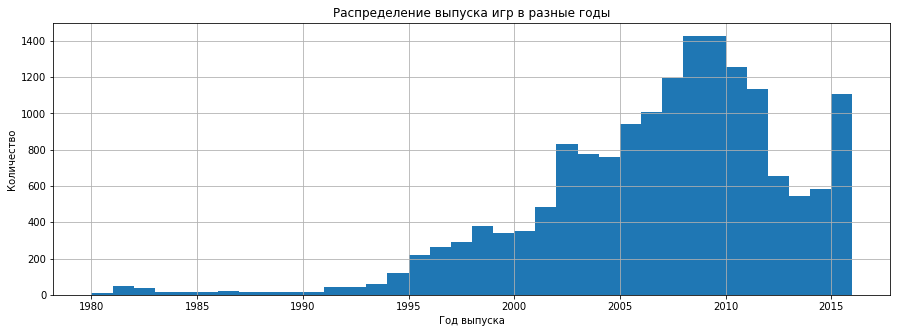

In [31]:
#строим гистограмму
df['year_of_release'].plot(kind='hist', figsize = (15, 5), grid=True, bins=36, title='Распределение выпуска игр в разные годы');
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.show()

По графику можно увидеть, что количество игр увеличивалось с каждым годом до 2010, затем произошел спад, и, начиная с 2014, вновь подъем. Много игр вышло в 2002 году - значение выделяется из общего тренда.

До 1995 года количество ежегодно выпускаемых игр не превышало 200 игр в год. В то время индустрия только появилась и начала развиваться.

Можно предположить, что данные за все временные периоды нам не столь важны, потому что более ранние годы не отражают актуальной ситуации в плане технологий, развития графики и оборудования, пользовательской аудитории и ее предпочтений. Меняются поколения игроков, консолей и разработчиков - менятся и сама индустрия.



## **Анализ продаж по платформам**

Рассмотрим продажи в зависимости от используемой платформы. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [32]:
platform_name = df.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).reset_index()
display(platform_name)

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Для построения наглядного графика возьмем первые 10 платформ с наибольшими суммарными продажами. В дальнейшем мы выберем потенциально прибыльные платформы, исходя из временного таймфрейма (то есть, наиболее актуальные).



In [33]:
platform_name = platform_name.query('total_sales > 100')
platform_name = platform_name['platform'].unique()
top_platform = df[df['platform'].isin(platform_name)].sort_values('year_of_release')

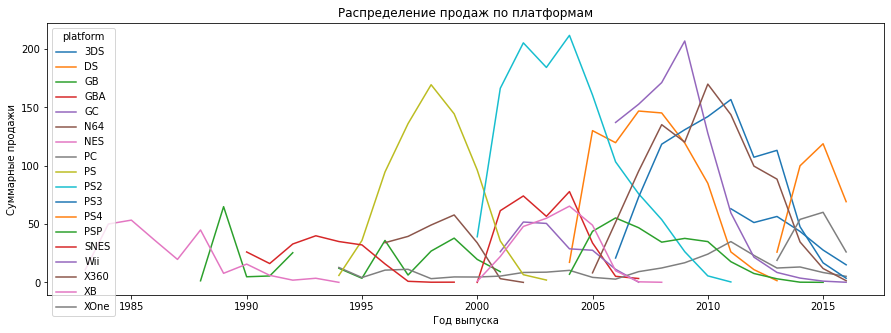

In [34]:
fig, ax = plt.subplots(figsize=(15,5))
pd.pivot_table(top_platform, index = 'year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(ax=ax);
plt.xlabel('Год выпуска');
plt.ylabel('Суммарные продажи');
plt.title('Распределение продаж по платформам');

Начиная с 1994 года при появлении новой платформы жизненный цикл ее популярности составляет около 10 лет, а пик популярности - примерно через 5 лет. 

По графику видно плавное изменение продаж платформ PS, PS2 и PS3 - при выпуске новой версии у старой происходил быстрый спад. Вероятнее всего, на пике продаж выходила новость о создании следующей версии платформы и люди жили в ожидании, не покупая (распродавая) игры для старых версий платформ.

## **Определение периода для анализа**

Определим период данных, который поможет построить прогноз на 2017 год.

Можно сказать, что:
* не стоит брать период более 10 лет
* с 2009 до 2011 есть спад продаж игр (повлиял мировой кризис 2008 года??)
* 4 из 6 платформ с наибольшими продажами игр находятся в периоде с 2004 по 2016 
* для анализа в качестве потенциально прибыльных платформ стоит выбирать более актуальные (сравнительно молодые) платформы.

Примем за актуальный период, который поможет построить прогноз на 2017 год, с 2012 по 2016 гг. Этот период со стабильными и растущими продажами игр и содержит информацию по 4 платформам с наибольшими суммарными продажами.

In [35]:
df = df.query('year_of_release > 2011') #сделали срез данных из датафрейма по условию


## **Определение потенциально прибыльных платформ**

Рассмотрим, какие платформы лидируют по продажам в выбранном для анализа таймфрейме, растут или падают, выберем несколько потенциально прибыльных платформ.

In [36]:
pd.pivot_table(df, index = 'year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


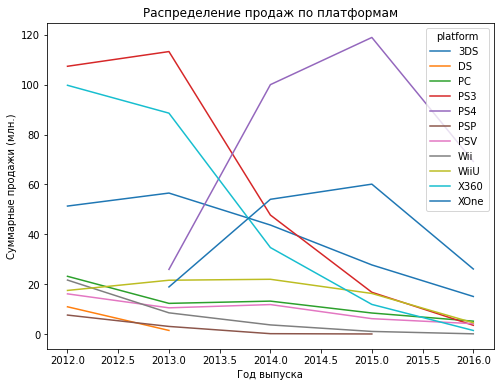

In [37]:
fig, ax = plt.subplots(figsize=(8,6))
pd.pivot_table(df, index = 'year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(ax=ax);
plt.xlabel('Год выпуска'), plt.ylabel('Суммарные продажи (млн.)')
plt.title('Распределение продаж по платформам');

Посмотрим на график суммарных продаж каждой платформы:

* DS и PSP не имеют продаж начиная с 2014 и 2016 соответственно - их точно не рассматриваем как потенциально прибыльные.
* у PSV продажи не превышали 20 млн. - до 2012 рост, затем спад в 2013, в 2014 снова рост и сильный спад в 2015-2016 годах
* PC имеет спадающий график и начиная с 2013 продажи примерно равны продажам платформы PSV
* WiiU имеет рост, начиная с 2012, и уходит на спад, начиная с 2014
* 3DS имеет хорошие продажи в 2011 и 2013, несмотря на небольшой упадок продаж в 2012, но начиная с 2014 продажи постепенно падают вниз (уменьшаясь примерно на 15 млн. за год)
* X360 и PS3 имеют замечательные продажи в 2011 - 2013 гг. но стремительно падают вниз, по причине выхода новых версий платформ: XOne и PS4 в 2013, которые начиная с 2013 имеют хороший рост.

Таким образом, **можно выделить 2 наиболее перспективные платформы на день составления прогноза - XOne и PS4**, пришедшие на смену более старым, но также крайне успешным X360 и PS3. возможно, к перспективным можно отнести WiiU, но по 2015 году у нее спад в продажах... Может, имеет смысл не распылять бюджет, а сконцентрироваться на явных лидерах.

В 2016 продажи игр на всех платфомах идут на спад, что, вероятно, связано с пробелами в данных (неполная статистика по продажам).

## **Построение графиков "ящик с усами"**

Построим график «ящик с усами» по глобальным продажам игр в разбивке по потенциально прибыльным платформам, определенным на предыдущем этапе, и проанализируем данные на наличи выбросов.

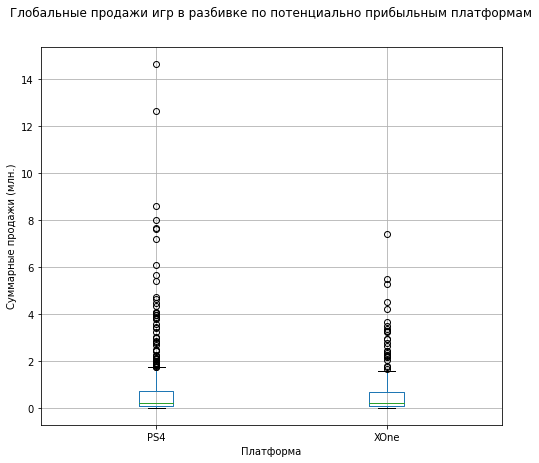

In [38]:
potential_platform = ['XOne', 'PS4'] #создали список наиболее интересных платформ для анализа
report = df.query('platform in @potential_platform') #сделали срез по датафрейму на основе списка
report.boxplot('total_sales', by='platform', figsize=(8, 7))
plt.suptitle('Глобальные продажи игр в разбивке по потенциально прибыльным платформам')
plt.title(None);
plt.xlabel('Платформа'), plt.ylabel('Суммарные продажи (млн.)')
#plt.ylim(0, 3)
plt.show()

Видим, что на обеих плаформах есть игры, чья выручка сильно превышает медианное значение, формируя выбросы на диаграмме. 

В то же время, медиана (половина всех наблюдений) лежит очень близко к нулевому порогу. 

Возможно, это значит, что в целом бОльшая часть игр не очень успешна. (?)
Рассмотрим более детально диаграммы размаха, удалив выбросы из анализа.

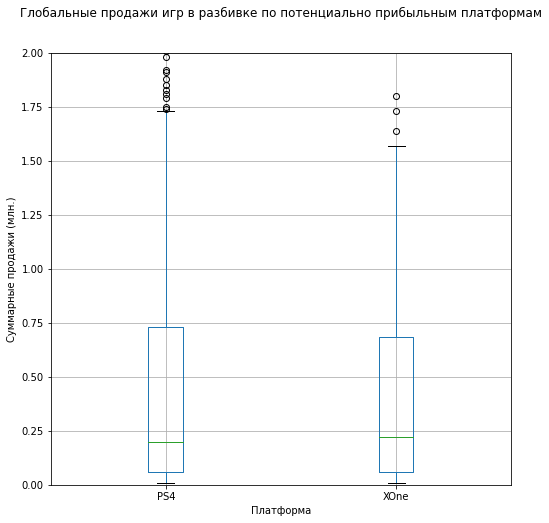

In [39]:
potential_platform = ['XOne', 'PS4']
report = df.query('platform in @potential_platform') 
report.boxplot('total_sales', by='platform', figsize=(8, 8))
plt.suptitle('Глобальные продажи игр в разбивке по потенциально прибыльным платформам')
plt.title(None);
plt.xlabel('Платформа'), plt.ylabel('Суммарные продажи (млн.)')
plt.ylim(0, 2)
plt.show()

Медианное значение выручки от продажи игры на 2 топ-платформах составляет 0.2 - 0,25 млн долл. Не густо!

75% от общего количества игр не дают выручку больше 0.75 млн долл.

Аномально высокой можно назвать выручку 1.6 млн долл и более.

## **Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы**

Построим диаграмму рассеяния, а также посчитаем корреляцию между отзывами и продажами. 

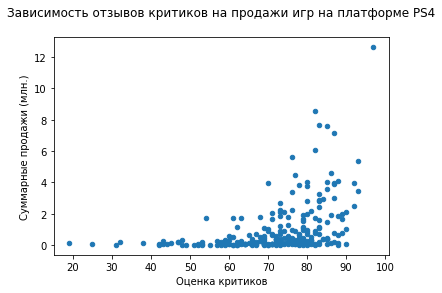

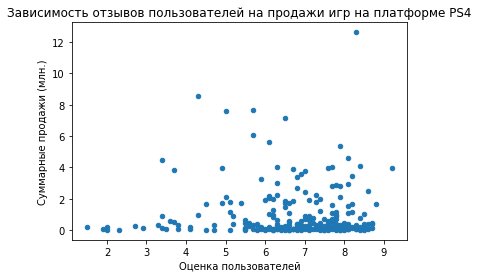

In [40]:
report = df.query('platform == "PS4" & critic_score > 0 & user_score > 0')
report.plot(x='critic_score', y='total_sales', kind='scatter');
plt.ylabel('Суммарные продажи (млн.)'), plt.xlabel('Оценка критиков'), plt.title('Зависимость отзывов критиков на продажи игр на платформе PS4\n');

report.plot(y='total_sales', x='user_score', kind='scatter');
plt.ylabel('Суммарные продажи (млн.)'), plt.xlabel('Оценка пользователей'), plt.title('Зависимость отзывов пользователей на продажи игр на платформе PS4');

In [41]:
display('Коэффициент корреляции отзывов критиков и продаж на PS4=', report['total_sales'].corr(report['critic_score']))

display('Коэффициент корреляции отзывов юзеров и продаж на PS4 =', report['total_sales'].corr(report['user_score']))

'Коэффициент корреляции отзывов критиков и продаж на PS4='

0.40589480145836687

'Коэффициент корреляции отзывов юзеров и продаж на PS4 ='

-0.03362497596528878

Коэффициенты Пирсона показывают отсутствие корреляции между отзывами пользователей и продажами игр на PS4. При этом между отзывами критиков и продажами также слабая корреляция.

## **Влияние отзывов пользователей и критиков на продажи на других платформах**

Соотнесем предыдущие выводы с продажами игр на других платформах. Для этого построим графики распределения для всех платформ, а коэффициент корреляции для удобства отображения запишем в отдельную таблицу.

In [42]:
data = {'platform':['PS3', 'X360', 'PS4', '3DS', 'Wii', 'DS', 'XOne', 'WiiU', 'PC',
       'PSV', 'PSP', 'PS2']} #отобрали список платформ для сравнения
table = pd.DataFrame(data, columns=['platform'])
table['corr_critic'] = 0 #коэф.Пирсона для отзывов критиков
table['corr_user'] = 0 #коэф.Пирсона для отзывов пользователей

In [43]:
#пишем функцию для построения графиков и заполнения таблицы. нулевые значения отфильтруем.
def plot_scatter(report, platform_name, table):
    report1 = report[report['critic_score'].isna() == False]
    if (not report1.empty):
        report1.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(5, 3));
        plt.ylabel('Суммарные продажи (млн.)'), plt.xlabel('Оценка критиков'), plt.title('Зависимость отзывов критиков на продажи игр на платформе ' + report1['platform'].unique());
        plt.show()
        table.loc[table['platform'] == platform_name, 'corr_critic'] = report['total_sales'].corr(report1['critic_score'])
    
    report2 = report[report['user_score'].isna() == False]
    if (not report2.empty):
        report2.plot(y='total_sales', x='user_score', kind='scatter', figsize=(5, 3));
        plt.ylabel('Суммарные продажи (млн.)'), plt.xlabel('Оценка пользователей'), plt.title('Зависимость отзывов пользователей на продажи игр на платформе ' + report2['platform'].unique());
        plt.show()
        table.loc[table['platform'] == platform_name, 'corr_user'] = report['total_sales'].corr(report2['user_score'])

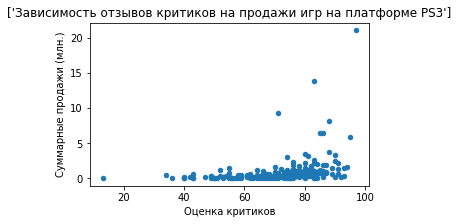

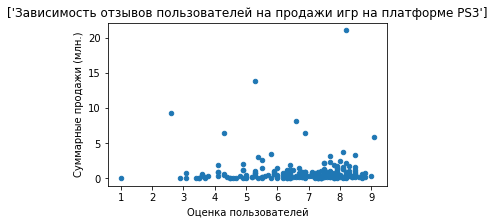

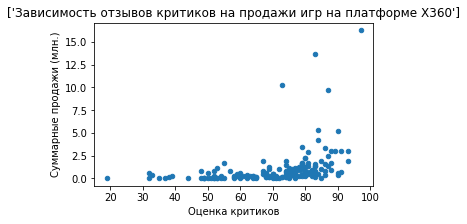

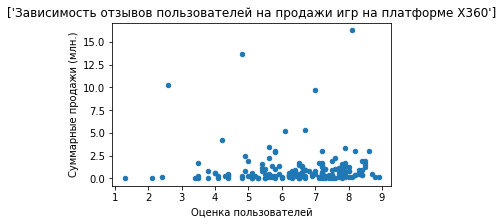

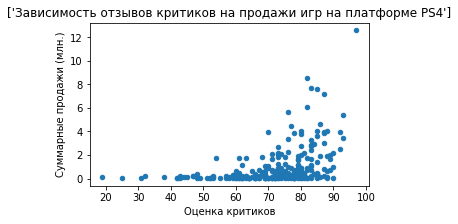

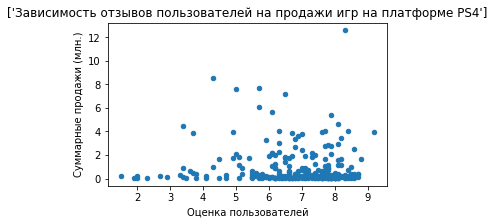

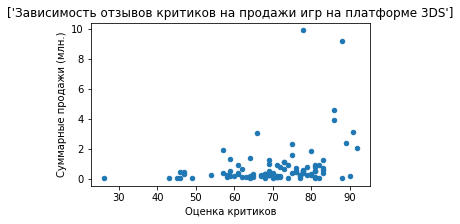

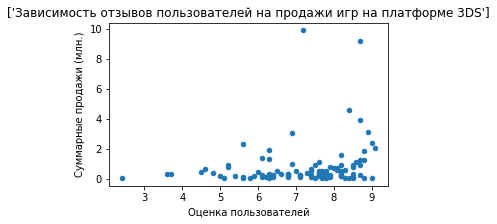

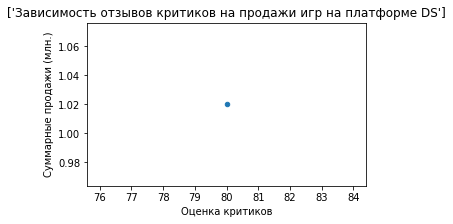

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


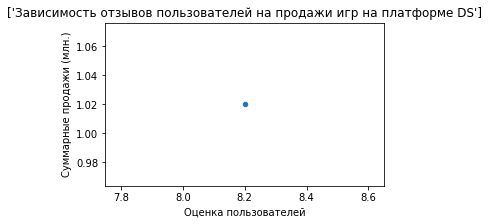

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


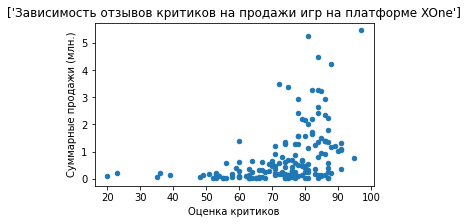

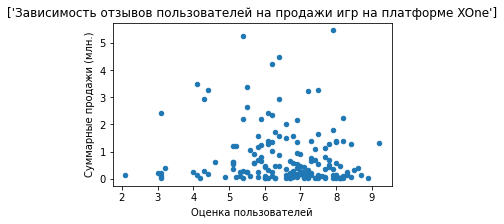

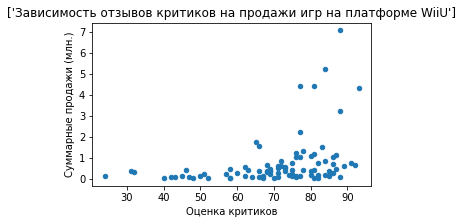

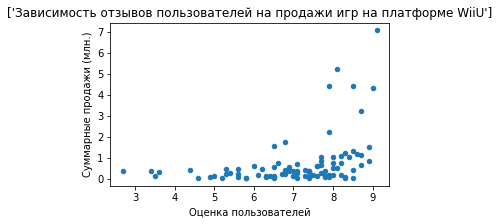

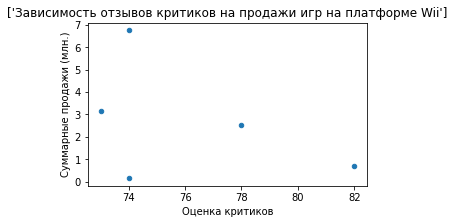

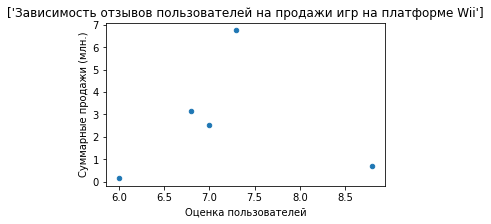

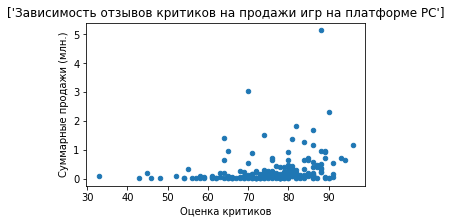

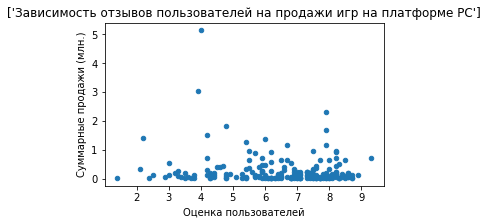

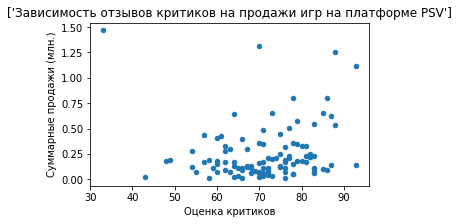

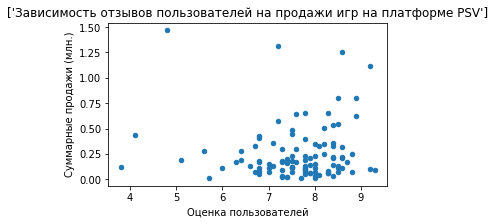

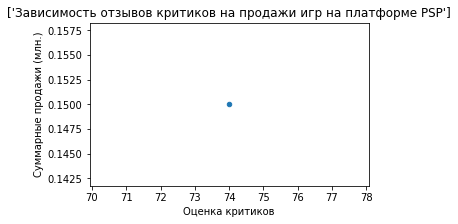

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


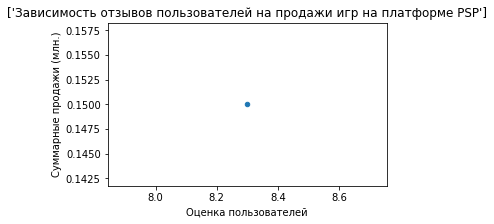

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [44]:
for platform_name in df['platform'].unique():
    report = df.query('platform == @platform_name & critic_score > -1 & user_score >-1') #здесь отфильтровала заглушки для пропусков
    plot_scatter(report, platform_name, table)

In [45]:
display(table)

,platform,corr_critic,corr_user
0,PS3,0.331057,0.003227
1,X360,0.360573,-0.002014
2,PS4,0.405895,-0.033625
3,3DS,0.310553,0.201813
4,Wii,-0.424341,0.009756
5,DS,NaN,NaN
6,XOne,0.410422,-0.094003
7,WiiU,0.350882,0.391848
8,PC,0.236008,-0.136934
9,PSV,0.093988,0.013902


По таблице коэффициентов корреляции можно заметить, что у всех платформ из топ-12 очень слабая корреляция между отзывами критиков и продажами игр. Коэффицинт не превышает 0.43.

Коэффициенты корреляции зависимости отзывов пользователей и продаж по топ-12 платформам также показывают отсутствие корреляции между отзывами юзеров и продажами.  Это значит, что отзывы пользователей и критиков практически не влияют на продажи игр для потенциально прибыльных платформ. 

## **Распределение игр по жанрам**

Посмотрим на общее распределение игр по жанрам, чтобы ответить на вопрос: выделяются ли жанры с высокими и низкими продажами?

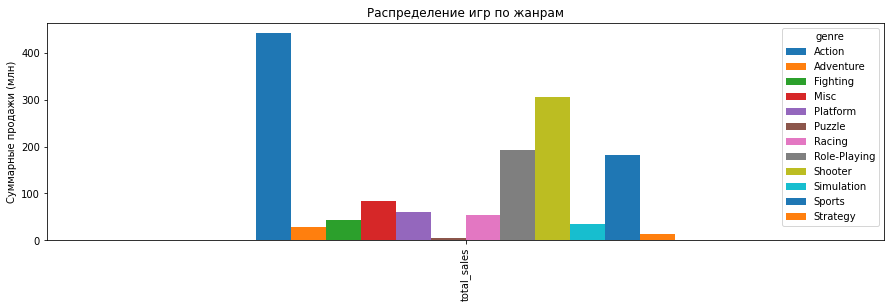

In [46]:
fig, ax = plt.subplots(figsize=(15,4))
pd.pivot_table(df, columns='genre', values='total_sales', aggfunc='sum').plot(ax=ax, kind='bar');
plt.ylabel('Суммарные продажи (млн)')
plt.title('Распределение игр по жанрам');

In [47]:
display(df.groupby('genre').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).reset_index())

,genre,total_sales
0,Action,441.12
1,Shooter,304.73
2,Role-Playing,192.80
3,Sports,181.07
4,Misc,85.04
5,Platform,61.00
6,Racing,53.50
7,Fighting,44.49
8,Simulation,35.12
9,Adventure,29.43


Жанрами с самыми высокими продажами являются жанры: Action (441.12 млн) и Shooter (304.73 млн)

Жанрами с самыми низкими продажами являются жанры: Puzzle (4.89) и Strategy (13.34)

Таким образом, определенно, жанр игры связан с ее возможной популярностью и прогнозируемыми продажами.

**ПОСМОТРИМ, КАК ВЫГЛЯДИТ ДИАГРАММА РАЗМАХА ПО ПРОДАЖАМ ИГР КАЖДОГО ЖАНРА НА 2 ПОТЕНЦИАЛЬНО ПРИБЫЛЬНЫХ ПЛАТФОРМАХ.**

**Сперва рассмотрим продажи на PS4**

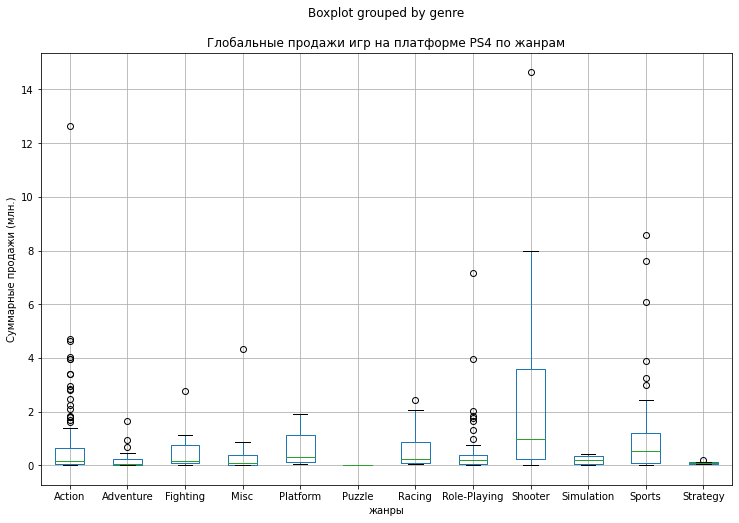

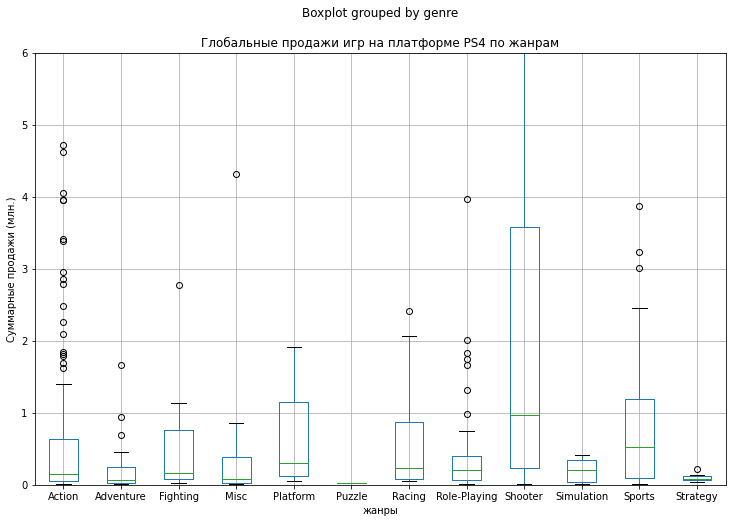

In [48]:
report = df.query('platform == "PS4" ') 
report.boxplot('total_sales', by='genre', figsize=(12, 8))
plt.title('Глобальные продажи игр на платформе PS4 по жанрам');
plt.xlabel('жанры'), plt.ylabel('Суммарные продажи (млн.)')
#plt.ylim(0, 6)
plt.show()

report = df.query('platform == "PS4" ') 
report.boxplot('total_sales', by='genre', figsize=(12, 8))
plt.title('Глобальные продажи игр на платформе PS4 по жанрам');
plt.xlabel('жанры'), plt.ylabel('Суммарные продажи (млн.)')
plt.ylim(0, 6)
plt.show()

**Построим диаграммы размаха и для платформы XOne**

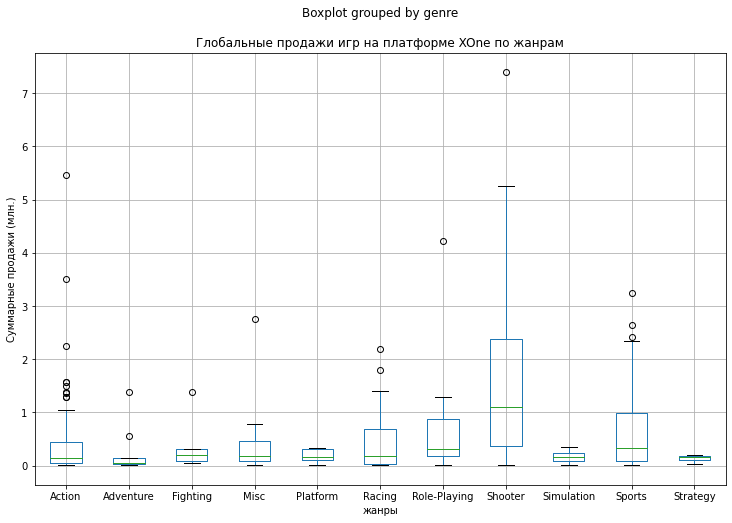

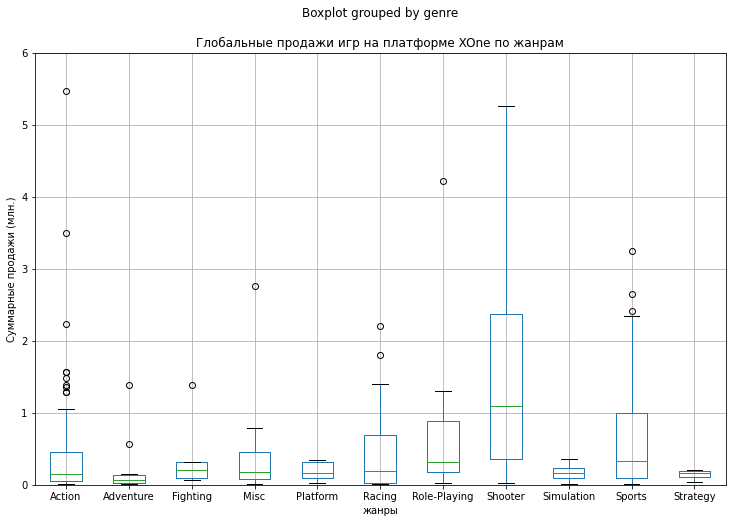

In [49]:
report = df.query('platform == "XOne" ') 
report.boxplot('total_sales', by='genre', figsize=(12, 8))
plt.title('Глобальные продажи игр на платформе XOne по жанрам');
plt.xlabel('жанры'), plt.ylabel('Суммарные продажи (млн.)')
#plt.ylim(0, 6)
plt.show()

report = df.query('platform == "XOne" ') 
report.boxplot('total_sales', by='genre', figsize=(12, 8))
plt.title('Глобальные продажи игр на платформе XOne по жанрам');
plt.xlabel('жанры'), plt.ylabel('Суммарные продажи (млн.)')
plt.ylim(0, 6)
plt.show()

Исходя из построенных диаграмм размаха, мы видим, что медианный объем продаж также выше не у жанра Action, а у игр в жанре Shooter. 

Например, на платформе PS4 около 75% игр этого жанра показывают выручку до 3,5 млн долл, 
На XOne у 75% от общего числа shooters приносят выручку  до 2,4 млн долл.

Медианный уровень продаж shooters на PS4 - 1 млн долл, на XOne - 1,1 млн долл.

На втором месте по медианным продажам теперь жанр sports: до 50% от общего числа игр в этом жанре показывает выручку примерно 0,3 - 0,5 млн долл, в зависимости от платформы.

Мы также видим, что 50% от общего числа игр в каждом жанре (кроме shooter) показывают выручку, в целом, незначительную, не превышающую 0,3 - 0,4 млн долл для одной платформы. 

Можно сделать вывод, что наиболее "стабильный" в плане продаж жанр - это shooter.

# 4. Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

* Самые популярные платформы (топ-5). Опишите различия в долях продаж.

* Самые популярные жанры (топ-5). Поясните разницу.

* Влияет ли рейтинг ESRB на продажи в отдельном регионе?



## **Определение популярных платформ**

In [50]:
#Построим сводную таблицу с данными по продажам по регионам. 
#Добавим в таблицу столбцы с %-ным соотношением продаж платформы и общими продажами в регионе

table = pd.pivot_table(df, index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False)
table['%_eu_sales'] = (table['eu_sales'] / table['eu_sales'].sum() * 100).round(1)
table['%_jp_sales'] = (table['jp_sales'] / table['jp_sales'].sum() * 100).round(1)
table['%_na_sales'] = (table['na_sales'] / table['na_sales'].sum() * 100).round(1)
display(table)

,eu_sales,jp_sales,na_sales,%_eu_sales,%_jp_sales,%_na_sales
platform,,,,,,
X360,74.52,1.57,140.05,14.7,0.8,23.7
PS4,141.09,15.96,108.74,27.8,8.3,18.4
PS3,106.86,35.29,103.38,21.1,18.3,17.5
XOne,51.59,0.34,93.12,10.2,0.2,15.8
3DS,42.64,87.79,55.31,8.4,45.6,9.4
WiiU,25.13,13.01,38.10,5.0,6.8,6.4
PC,37.76,0.00,19.12,7.5,0.0,3.2
Wii,11.92,3.39,17.45,2.4,1.8,3.0
PSV,11.36,21.04,10.98,2.2,10.9,1.9


В США топ-5 платформ составляют, в порядке убывания: X360, PS4, PS3, XOne, 3DS. В сумме на X360 и PS3 приходится 47,6% от всех продаж в регионе за исследуемый период. А топ-3 платформы обеспечивают уже более 60%.

В Европе топ-5 платформ составляют, в порядке убывания: PS4, PS3, X360, XOne, 3DS. На первые 3 приходится 48,9% от всех продаж в регионе.

В Японии топ-5 платформ составляют, в порядке убывания: 3DS, PS3, PSV, PS4, PSP. Nintendo 3DS обеспечила 45,6% от всех продаж в регионе, PS3 - еще 18,3%.

Заметно, что в Японии более популярны портативные консоли. 

In [51]:
tab1 = table.reset_index().drop(columns = ['eu_sales','jp_sales', 'na_sales'])
TOP = 6
tab2 = tab1.iloc[:TOP]
tab2 = tab2.append({'platform': 'Other', '%_eu_sales': tab1['%_eu_sales'].iloc[TOP:].sum(), 
                    '%_jp_sales': tab1['%_jp_sales'].iloc[TOP:].sum(), 
                    '%_na_sales': tab1['%_na_sales'].iloc[TOP:].sum()}, ignore_index=True)

display(tab2)

,platform,%_eu_sales,%_jp_sales,%_na_sales
0,X360,14.7,0.8,23.7
1,PS4,27.8,8.3,18.4
2,PS3,21.1,18.3,17.5
3,XOne,10.2,0.2,15.8
4,3DS,8.4,45.6,9.4
5,WiiU,5.0,6.8,6.4
6,Other,12.9,20.0,8.9


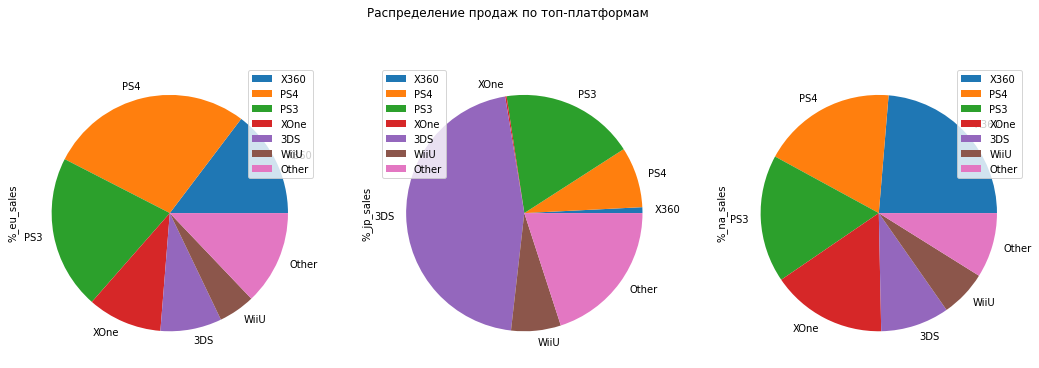

In [52]:
tab2.set_index('platform').plot.pie(subplots = True,  
                                    legend=True, figsize = (18,6), title ='Распределение продаж по топ-платформам');

## **Определение популярных жанров**

In [53]:
#Построим сводную таблицу с данными по продажам по регионам и жанрам. 
#Добавим в таблицу столбцы с %-ным соотношением продаж по жанрам и общими продажами в регионе

table2 = pd.pivot_table(df, index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False)
table2['%_eu_sales'] = (table2['eu_sales'] / table2['eu_sales'].sum() * 100).round(1)
table2['%_jp_sales'] = (table2['jp_sales'] / table2['jp_sales'].sum() * 100).round(1)
table2['%_na_sales'] = (table2['na_sales'] / table2['na_sales'].sum() * 100).round(1)
display(table2)

,eu_sales,jp_sales,na_sales,%_eu_sales,%_jp_sales,%_na_sales
genre,,,,,,
Action,159.34,52.80,177.84,31.4,27.4,30.1
Shooter,113.47,9.23,144.77,22.4,4.8,24.5
Sports,69.09,8.01,81.53,13.6,4.2,13.8
Role-Playing,48.53,65.44,64.00,9.6,34.0,10.8
Misc,26.32,12.86,38.19,5.2,6.7,6.5
Platform,21.41,8.63,25.38,4.2,4.5,4.3
Fighting,10.79,9.44,19.79,2.1,4.9,3.3
Racing,27.29,2.50,17.22,5.4,1.3,2.9
Adventure,9.46,8.24,8.92,1.9,4.3,1.5



В США топ-5 жанров составляют, в порядке убывания: action, shooter, sports, role-playing, misc.

В Европе топ-5 жанров составляют, в порядке убывания: action, shooter, sports, role-playing, racing.

В Японии топ-5 жанров составляют, в порядке убывания: role-playing, action, misc, simulation, fighting. 

Топ 5 популярных жанов в Северной Америке и Европе примерно одинаков (только в Европе популярны также гонки). В Японии, вероятно из-за разницы менталитетов, жанровые предпочтения также отличаются. RPG - в топе.

Заметно, что на жанр-лидер приходится более 30% продаж в соответствующем регионе. Доля второго по популярности жанра лежит в диапазоне 22-28%. То есть, топ-2 жанра обеспечивают более 50% от всех продаж игр.

In [54]:
tab1 = table2.reset_index().drop(columns = ['eu_sales','jp_sales', 'na_sales'])
TOP = 5
tab2 = tab1.iloc[:TOP]
tab2 = tab2.append({'genre': 'Other', '%_eu_sales': tab1['%_eu_sales'].iloc[TOP:].sum(), 
                    '%_jp_sales': tab1['%_jp_sales'].iloc[TOP:].sum(), 
                    '%_na_sales': tab1['%_na_sales'].iloc[TOP:].sum()}, ignore_index=True)

display(tab2)

,genre,%_eu_sales,%_jp_sales,%_na_sales
0,Action,31.4,27.4,30.1
1,Shooter,22.4,4.8,24.5
2,Sports,13.6,4.2,13.8
3,Role-Playing,9.6,34.0,10.8
4,Misc,5.2,6.7,6.5
5,Other,17.8,23.0,14.2


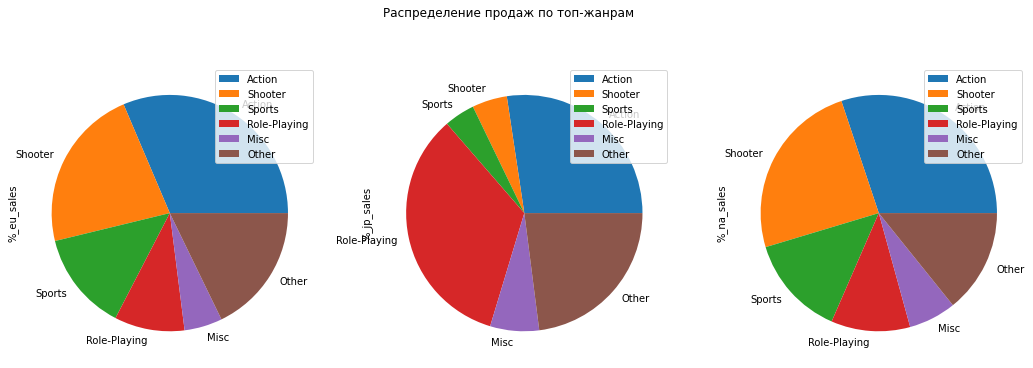

In [55]:
tab2.set_index('genre').plot.pie(subplots = True,  
                                    legend=True, figsize = (18,6), title ='Распределение продаж по топ-жанрам');

In [56]:
#пишем функцию для построения диаграмм размаха для сравнения медиаанных продааж по жанрам в разных регионах

def top_genres_by_region(region_sales):
    df.boxplot(region_sales, by='genre', figsize=(12, 8))
    #plt.title('region_sales','продажи игр по жанрам ');
    plt.xlabel('жанры'), plt.ylabel('Суммарные продажи (млн.)')
    plt.ylim(0, 2)
    plt.show()

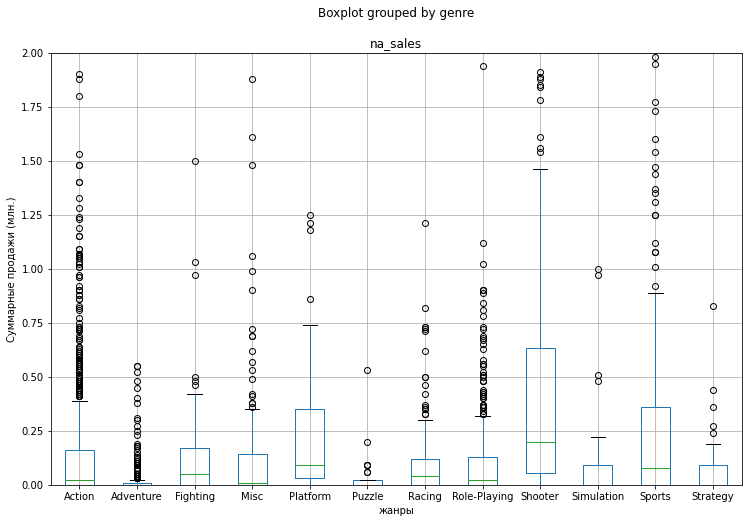

None

In [57]:
display(top_genres_by_region('na_sales'))   

Для Северной Америки игры в жанре action показывают сравнительно более низкие продажи, чем в жанре shooter и sports.

Необходимо отметить, что ряд игр в жанре platform, хоть он не попал в рейтинг ТОП-5, также были успешнее аналогов в жанре action. 

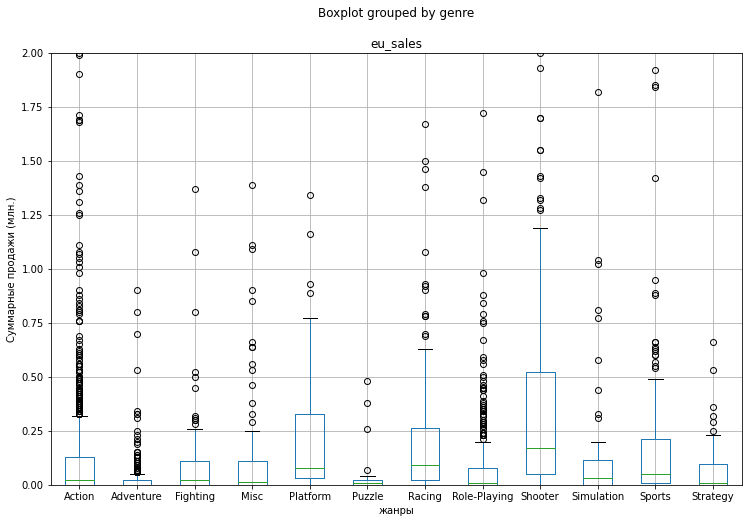

None

In [58]:
display(top_genres_by_region('eu_sales'))

Для Европы картина схожая: несмотря на то, что в жанре action выходит больше всего игр, что в общей массе дает большую долю в объеме продаж, медианные продажи в этом жанре ниже, чем в shooter, platform, racing и sports.

Ряд игр в жанре platform, хоть он не попал в рейтинг ТОП-5, также были успешнее аналогов в жанре action. 

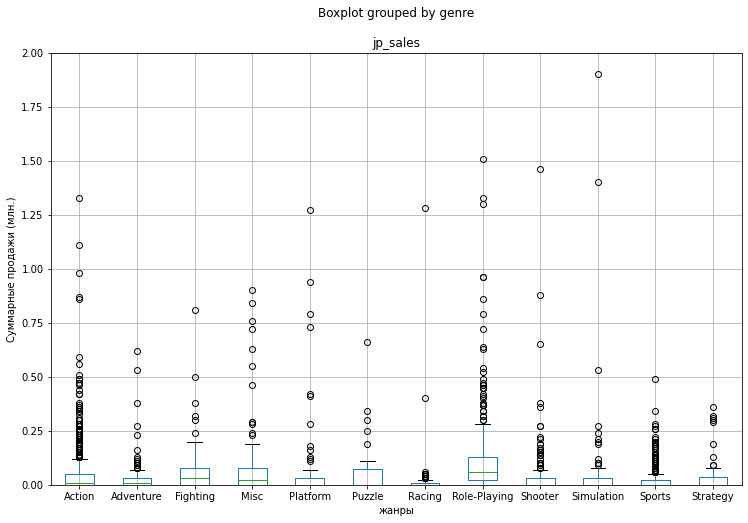

None

In [59]:
display(top_genres_by_region('jp_sales'))

Для Японии самый прибыльный жанр - role-playing, медианые продажи также выше в жанрах Fighting, Misc.

## **Жанры самых продаваемых игр (топ 5) по регионам**

In [60]:
display(df.sort_values(by='na_sales', ascending=False).head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87,7.0,M,9.71


In [61]:
display(df.sort_values(by='eu_sales', ascending=False).head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60


In [62]:
display(df.sort_values(by='jp_sales', ascending=False).head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
73,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88,8.7,E,9.17
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
385,Monster Hunter 4,3DS,2013,Role-Playing,0.00,0.00,3.44,0.00,-1,-1.0,unknown,3.44
412,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,0.09,0.00,3.18,0.01,-1,-1.0,unknown,3.28
83,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,2.79,1.72,3.14,0.41,-1,-1.0,unknown,8.06


Самые продаваемые игры:
* в Северной Америке - созданы в жанре жанры Action (Grand Theft Auto V на платформах X360 и PS3) и Shooter (разновидности Call of Duty, а также Halo4)
* в Европе - также в жанре Action (Grand Theft Auto V на платформах PS4 и PS3) и Shooter (Call of Duty: Black Ops 3), но также присутствуют игры жанра Sports (FIFA 16 и FIFA 17)
* в Японии совсем иная ситуация: самая популярная игра создана в жанре Simulation (Animal Crossing: New Leaf), остальные игры из ТООП-5 - в Role-Playing, что, скорее всего связано с культурой населения.

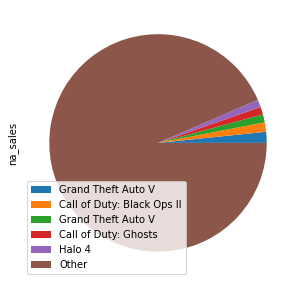

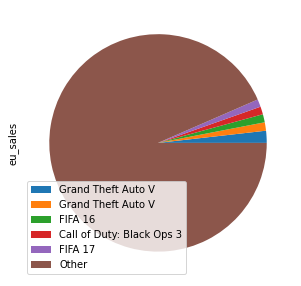

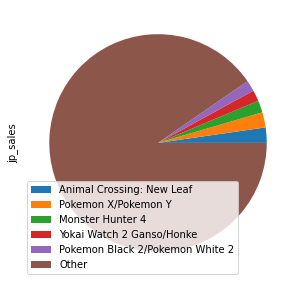

In [63]:
#Напишем функцию для построения диаграмм
def top_games(region_sales, TOP):
    data = df[['name', region_sales]].sort_values(by=region_sales, ascending=False)
    data_other = data.iloc[:TOP]
    data_other = data_other.append({'name': 'Other', region_sales: data[region_sales].iloc[TOP:].sum()}, ignore_index=True)
    #display(data_other)
    data_other.set_index('name').plot(kind = 'pie', y = region_sales, figsize = (5,5),legend = True, labels = None)
    plt.show()

top_games('na_sales', 5)    
top_games('eu_sales', 5)
top_games('jp_sales', 5)

## **Влияние рейтинга ESRB на продажи в отдельном регионе**

In [64]:
display(df['rating'].unique())#вспомним, какие значения есть в столбце с рейтингом

array(['M', 'unknown', 'E', 'E10+', 'T'], dtype=object)

In [65]:
#Построим сводную таблицу с данными по продажам по регионам и жанрам. 
#Добавим в таблицу столбцы с %-ным соотношением продаж по жанрам и общими продажами в регионе

table3 = pd.pivot_table(df, index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False)
table3['%_eu_sales'] = (table3['eu_sales'] / table3['eu_sales'].sum() * 100).round(1)
table3['%_jp_sales'] = (table3['jp_sales'] / table3['jp_sales'].sum() * 100).round(1)
table3['%_na_sales'] = (table3['na_sales'] / table3['na_sales'].sum() * 100).round(1)
display(table3)

,eu_sales,jp_sales,na_sales,%_eu_sales,%_jp_sales,%_na_sales
rating,,,,,,
M,193.96,21.20,231.57,38.3,11.0,39.2
E,113.03,28.33,114.37,22.3,14.7,19.4
unknown,91.50,108.84,103.31,18.1,56.5,17.5
E10+,55.37,8.19,75.70,10.9,4.3,12.8
T,52.96,26.02,66.02,10.4,13.5,11.2


В Японии действует собственное агентство по выдаче рейтинга играм - Computer Entertainment Rating Organization (CERO). Если вы хотите издавать вашу игру на консолях в этой стране, вы обязаны получить этот рейтинг. Поэтому рейтинг ESRB  для оценок продаж в Японии неактуален. отсюда - большое количество значений unknown в датафрейме.

ESRB действует в США, в Европе есть PEGI.

Можно отметить, что игры категории М (для взрослых) занимают по 38-39% в структуре продаж в США и Европе. На втором месте в этих регионах - игры всех возрастов (категория Е, по 19-22% в структуре продаж).

Доля игр для подростков составляет примерно 10-11% от общей структуры, игр для детей 10+ - около 11% (Европа) и 13% (США).

В целом, если не принимать во внимание Японию, оценки ESRB можно использовать как доп.факатор в прогнозировани успешности игры, наряду с жанром. Как ни прискорбно, доля игр со сценами насилия и жестокости, все еще достаточно велика - стремится к 40%.

## Выводы

**Портрет пользователя из США**
* топ-5 платформ составляют, в порядке убывания: X360, PS4, PS3, XOne, 3DS. В сумме на X360 и PS3 приходится 47,6% от всех продаж в регионе за исследуемый период. А топ-3 платформы обеспечивают уже более 60%.
* несмотря на то, что в жанре action выходит больше всего игр и поэтому они в сумме занимают самую весомую долю в структуре продаж, наиболее прибыльные игры - реализуются в жанрах shooter, sports, platform.
* самые популярные игры - в жанре жанры Action (Grand Theft Auto V на платформах X360 и PS3) и Shooter (разновидности Call of Duty, а также Halo4)
* игры категории М (для взрослых) занимают 39% в структуре продаж. На втором месте - игры всех возрастов (категория Е, примерно 19% в структуре продаж.
* Доля игр для подростков (Т) составляет 11% от общей структуры, игр для детей 10+ (Е10+) - около 13%.

**Портрет пользователя из Европы**
* топ-5 платформ составляют, в порядке убывания: PS4, PS3, X360, XOne, 3DS. На первые 3 приходится 48,9% от всех продаж в регионе.
* несмотря на то, что в жанре action выходит больше всего игр и поэтому они в сумме занимают самую весомую долю в структуре продаж, наиболее прибыльные игры - реализуются в жанрах shooter, platform, racing.
* Самые популярные игры - в жанре Action (Grand Theft Auto V на платформах PS4 и PS3) и Shooter (Call of Duty: Black Ops 3), но также присутствуют игры жанра Sports (FIFA 16 и FIFA 17)
* игры категории М (для взрослых) занимают 38% в структуре продаж. На втором месте игры всех возрастов (Е) - 22% в структуре продаж.
* Доля игр для подростков (Т) составляет примерно 10% от общей структуры, игр для детей 10+ (Е10+) - около 11%.

**Портрет пользователя из Японии**
* топ-5 платформ составляют, в порядке убывания: 3DS, PS3, PSV, PS4, PSP. Nintendo 3DS обеспечила 45,6% от всех продаж в регионе, PS3 - еще 18,3%.
* несмотря на то, что в жанре action выходит больше всего игр и поэтому они в сумме занимают самую весомую долю в структуре продаж, наиболее прибыльные игры - реализуются в жанрах role-playing, медианые продажи также выше в жанрах Fighting, Misc.
* Самая популярная игра создана в жанре Simulation (Animal Crossing: New Leaf), остальные игры из ТООП-5 - в Role-Playing, что, скорее всего связано с культурой населения.

**Интересные особенности**
* В Японии, вероятно из-за разницы менталитетов, жанровые предпочтения также отличаются. RPG - в топе.
* В Японии действует собственное агентство по выдаче рейтинга играм - Computer Entertainment Rating Organization (CERO). Поэтому рейтинг ESRB для оценок продаж в Японии неактуален. 
* ESRB действует в США, в Европе есть PEGI.
* Оценки ESRB можно использовать как доп.факатор в прогнозировани успешности игры (кроме прогнозов по Японии), наряду с жанром.
* Доля самой популярной категории игр со сценами насилия и жестокости (категория М) стремится к 40% и примерно одинакова в США и Европе.



# 5. Проверка гипотез

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры ) и Sports (англ. «спортивные с оревнования») разные.

Задайте самостоятельно пороговое значение alpha .

Поясните:

* Как вы сформулировали нулевую и альтернативную гипотезы;

* Какой критерий применили для проверки гипотез и почему.

### Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Начнём с формулировки нулевой гипотезы H₀ - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые, тогда альтернативной гипотезой H₁ будет: cредние пользовательские рейтинги платформ Xbox One и PC различаются

Воспользуемся гипотезой о равенстве средних двух генеральных совокупностей, Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примем метод scipy.stats.ttest_ind(). Методу передадим в качестве параметров массивы, содержащие выборки.

In [66]:
df_XOne = df.query('platform == "XOne" & user_score != -1')
df_PC = df.query('platform == "PC" & user_score != -1')
user_score_df_XOne = df_XOne['user_score']
user_score_df_PC = df_PC['user_score']
alpha = 0.05
results = st.ttest_ind(user_score_df_XOne, user_score_df_PC, equal_var=False)

При установки значения параметра equal_var = False гипотезы проверяются по тесту, основанный на распределении Стьюдента: t-критерий Уэлча. Он более надежен, когда две выборки имеют неравные дисперсии и / или неравные размеры выборки

In [67]:
display('p-значение =', results.pvalue)

'p-значение ='

0.5489537965134912

In [68]:
if (results.pvalue < alpha):
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу о том, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые')

'Не получилось отвергнуть нулевую гипотезу о том, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые'

Стат.тест показал, что у нас нет весомых оснований, чтобы отвергать нулевую гипотезу: cредние пользовательские рейтинги платформ Xbox One и PC одинаковы.

Если сравнить средний пользовательский рейтинг этих двух платформ, то мы получим значения: 6.5 и 6.4

In [69]:
df_XOne = df.query('platform == "XOne" & user_score != -1')
display('Средний пользовательский рейтинг XOne', df_XOne['user_score'].mean())
df_PC = df.query('platform == "PC" & user_score != -1')
display('Средний пользовательский рейтинг PC', df_PC['user_score'].mean())

'Средний пользовательский рейтинг XOne'

6.521428571428572

'Средний пользовательский рейтинг PC'

6.4286407766990274

### Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулирум нулевую гипотезу H₀ - cредние пользовательские рейтинги жанров Action и Sports одинаковые, тогда альтернативной гипотезой H₁ будет: cредние пользовательские рейтинги жанров Action и Sports различаются.

Воспользуемся гипотезой о равенстве средних двух генеральных совокупностей, Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примем метод scipy.stats.ttest_ind(). Методу передадим в качестве параметров массивы, содержащие выборки.

In [70]:
df_Action = df.query('genre == "Action" & user_score != -1')
df_Sports = df.query('genre == "Sports" & user_score != -1')
user_score_df_Action = df_Action['user_score']
user_score_df_Sports = df_Sports['user_score']
alpha = 0.05
results = st.ttest_ind(user_score_df_Action, user_score_df_Sports, equal_var=False)

При установки значения параметра equal_var = False гипотезы проверяются по тесту, основанный на распределении Стьюдента: t-критерий Уэлча. Он более надежен, когда две выборки имеют неравные дисперсии и / или неравные размеры выборки

In [71]:
display('p-значение =', results.pvalue)

'p-значение ='

4.24307776572644e-20

In [72]:
if (results.pvalue < alpha):
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу, о том, что cредние пользовательские рейтинги жанров Action и Sports одинаковые')

'Отвергаем нулевую гипотезу'

Стат.тест показал, что у нас есть основания отвергнуть нулевую гипотезу и принять за истину альтернативную - cредние пользовательские рейтинги жанров Action и Sports различаются.

Средний пользовательский рейтинг action равен 6.8

Средний пользовательский рейтинг sports равен 5.5

In [73]:
display('Средний пользовательский рейтинг в жанре Action:', user_score_df_Action.mean())
display('Средний пользовательский рейтинг в жанре Sports:', user_score_df_Sports.mean())

'Средний пользовательский рейтинг в жанре Action:'

6.825047801147227

'Средний пользовательский рейтинг в жанре Sports:'

5.455897435897437

## Выводы

Путем проверки гипотез мы подтверждаем ранее сформулированные предположения:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action и Sports различаются.

# 6. Общий Вывод

Закономерности, определяющие успешность игры и полезные для планирования рекламной кампании:
* ТОП-платформы - PS4 или XOne
* отзывы критиков и пользователей слабо связаны с объемом продааж
* определенно, жанр игры связан с ее возможной популярностью и прогнозируемыми продажами
* наиболее "стабильный" в плане продаж жанр - это shooter
* на платформе PS4 около 75% игр этого жанра показывают выручку до 3,5 млн долл, на XOne у 75% от общего числа shooters приносят выручку  до 2,4 млн долл.
* медианный уровень продаж shooters на PS4 - 1 млн долл, на XOne - 1,1 млн долл.
* на втором месте по продажам  жанр sports: до 50% от общего числа игр в этом жанре показывает выручку примерно 0,3 - 0,5 млн долл (по двум ТОП-платформам)
* 50% от общего числа игр в каждом жанре (кроме shooter) показывают выручку, в целом, незначительную, не превышающую 0,3 - 0,4 млн долл для одной платформы
* для американского и европейского рынка предпочтительно продвижение игр с рейтингом М и Е, в жанрах shooter, sports, platform
* для европейского рынка предпочтительно продвижение игр с рейтингом М и Е, в жанрах shooter, platform, racing
* рейтинг ESRB не имеет значения для японского рынка
* у японской аудитории жанровые предпочтения и топ-платформы совершенно другие, нежели у Европы и Сев.Америки. В Японии топ-платформа - Nintendo 3DS, наиболее прибыльный жанр - role-playing, fighting, misc
* **несмотря на то, что в жанре action выходит больше всего игр и поэтому они в сумме занимают самую весомую долю в структуре продаж, наиболее прибыльными являются другие жанры (shooter для Сев.Америки и Европы и role-playing - для Японии).**
